# Visualizando kernel PCA

A ideia desse notebook é mostrar como podemos observar a separação feita pelo **PCA com kernel RBF**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

In [2]:
plt.rcParams['figure.dpi'] = 140
plt.rcParams['figure.figsize'] = (10, 8)
for spine in ['top', 'right']:
    plt.rcParams[f'axes.spines.{spine}'] = False

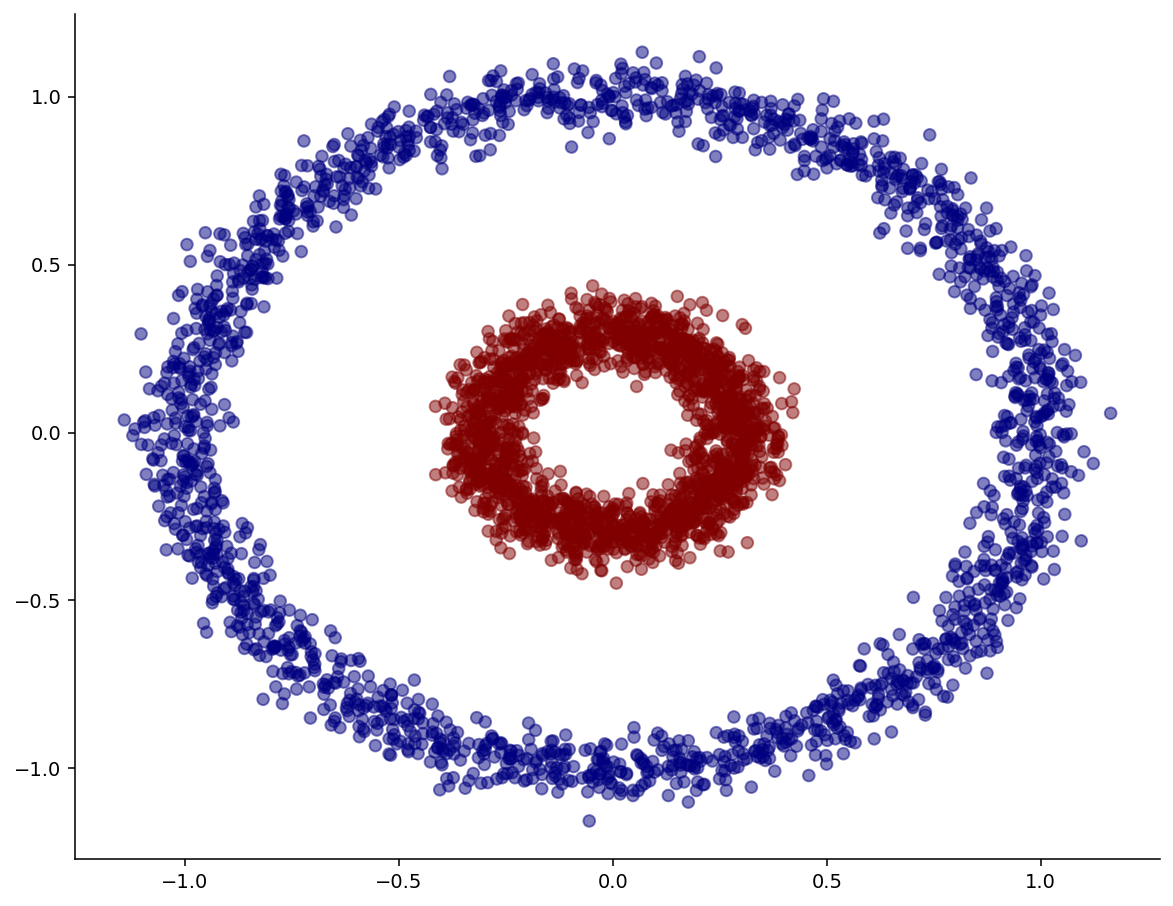

In [3]:
features, labels = make_circles(n_samples=4000, factor=.3, noise=.05)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(features[:, 0], features[:, 1], c=labels, alpha=0.5, cmap='jet');

In [4]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5, random_state=42)
x_kpca = kpca.fit_transform(features)

zeros = labels == 0
ones = labels == 1

x_min = features[:, 0].min() - .5
x_max = features[:, 0].max() + .5
y_min = features[:, 1].min() - .5
y_max = features[:, 1].max() + .5

XX = np.arange(x_min, x_max, .05)
YY = np.arange(y_min, y_max, .05)
xx, yy = np.meshgrid(XX, YY)
ZZ = np.c_[xx.ravel(), yy.ravel()]
ZZ = kpca.transform(ZZ)
zz = ZZ[:, 0].reshape(xx.shape)

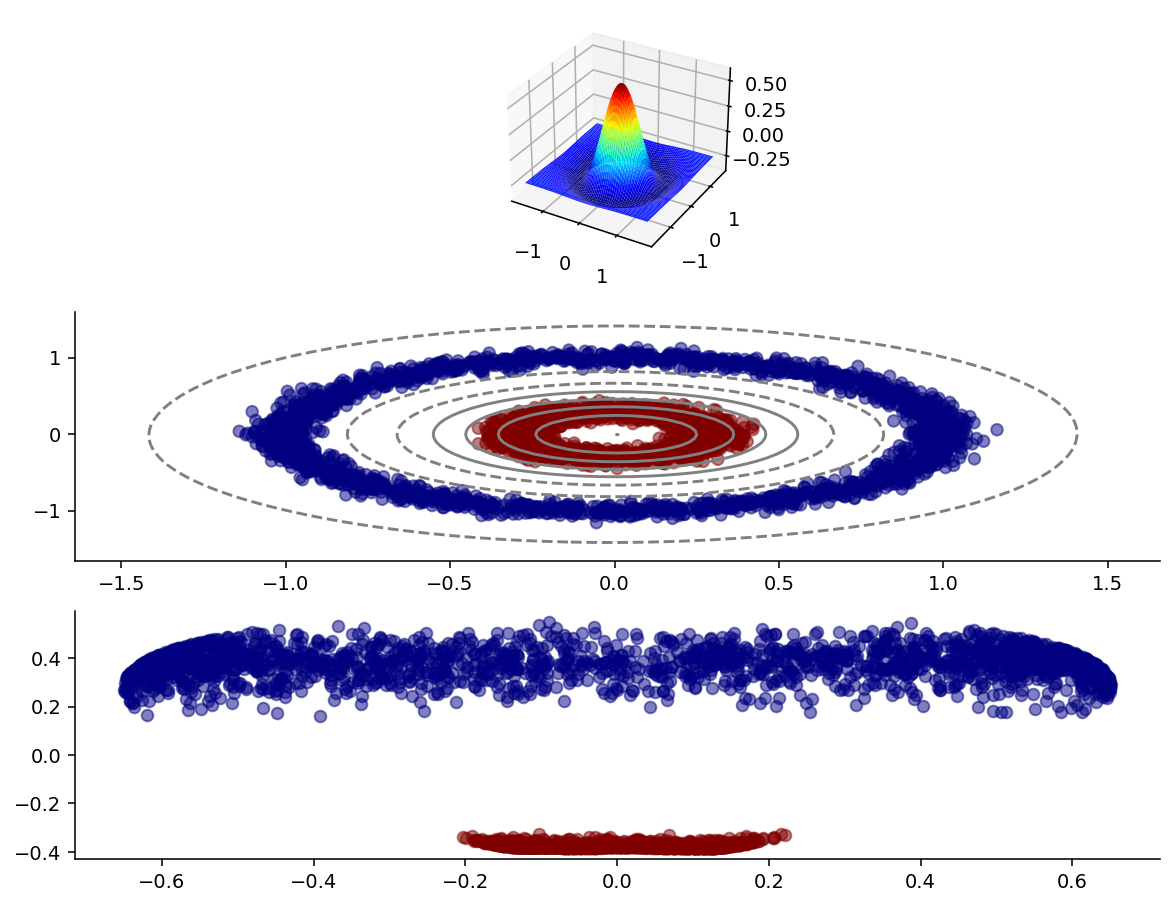

In [5]:
fig = plt.figure()
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='jet')

ax = fig.add_subplot(312)
ax.scatter(features[:, 0], features[:, 1], c=labels, alpha=0.5, cmap='jet')
ax.contour(xx, yy, zz, colors='gray')

ax = fig.add_subplot(313)
ax.scatter(x_kpca[zeros, 1], x_kpca[zeros, 0], c='#800000', alpha=0.5)
ax.scatter(x_kpca[ones, 1], x_kpca[ones, 0], c='#000080', alpha=0.5);